In [2]:
import openeo
import numpy as np
import matplotlib.pyplot as plt
import imageio
import rasterio
from rasterio.plot import show
import seaborn as sns

In [3]:
connection = openeo.connect("https://openeo.dataspace.copernicus.eu/openeo/1.2").authenticate_oidc()

Authenticated using refresh token.


In [4]:
c = connection.list_collections()

for d in c:
    print(d["id"])

SENTINEL3_OLCI_L1B
SENTINEL3_SLSTR
SENTINEL_5P_L2
COPERNICUS_VEGETATION_PHENOLOGY_PRODUCTIVITY_10M_SEASON1
COPERNICUS_VEGETATION_PHENOLOGY_PRODUCTIVITY_10M_SEASON2
COPERNICUS_PLANT_PHENOLOGY_INDEX
ESA_WORLDCOVER_10M_2020_V1
ESA_WORLDCOVER_10M_2021_V2
COPERNICUS_VEGETATION_INDICES
SENTINEL2_L1C
SENTINEL2_L2A
SENTINEL1_GRD
COPERNICUS_30
LANDSAT8_L2
SENTINEL3_SYN_L2_SYN
SENTINEL3_SLSTR_L2_LST


In [255]:
print(c[0]["providers"])

[]


In [4]:
#spat_ext = {"west": 13.20, "south": 52.47, "east": 13.21, "north": 52.48}
datacube = connection.load_collection("SENTINEL2_L2A", \
        spatial_extent={"west": 13.10, "south": 52.37, "east": 13.66, "north": 52.64}, \
        temporal_extent=["2024-05-15", "2024-05-17"], \
        bands=["B04", "B03", "B02"]
        )

In [14]:
#datacube = datacube.reduce_dimension(dimension='t', reducer='mean')

#result = datacube.download(outputfile="red.png")
result = datacube.download()
#image_array = np.array(result)

/tmp/ipykernel_1241557/3851580895.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image_array = imageio.imread(result)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


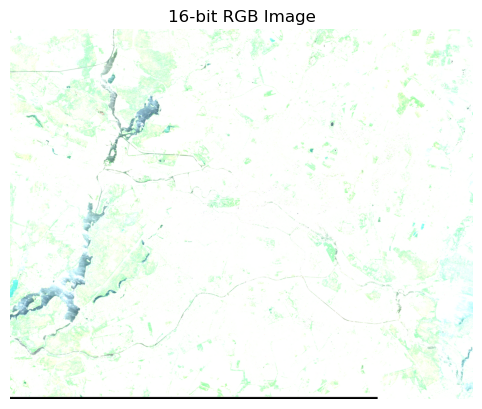

In [29]:
image_array = imageio.imread(result)
rgb_im = np.stack([image_array[0], image_array[1], image_array[2]], axis=-1)
plt.imshow(rgb_im, vmin=0, vmax=65535)  # Display the full 16-bit range
plt.title('16-bit RGB Image')
plt.axis('off')  # Turn off axis
plt.show()

In [59]:
image_array = imageio.imread(result)
clipped_image = np.clip(image_array, 0, 2500)

print(clipped_image.dtype)
clipped_image = clipped_image.astype(np.float64)
clipped_image /= 2500
clipped_image *= 255

rgb_im = np.stack([clipped_image[0], clipped_image[1], clipped_image[2]], axis=-1)

rgb_im = rgb_im.astype(np.uint8)

/tmp/ipykernel_1241557/42768327.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image_array = imageio.imread(result)


int16


In [20]:
print(rgb_im.dtype)

uint8


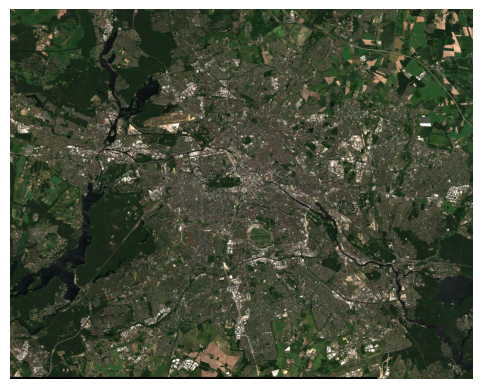

In [60]:
plt.imshow(rgb_im)
plt.axis('off')  # Turn off axis
plt.show()

In [62]:
def display_dist(arr, bin_size, log):
    pixel_values = arr.flatten()

    # Define the bin edges. Each bin has a size of 100.
    bins = np.arange(0, pixel_values.max() + bin_size, bin_size)

    # Plotting the histogram
    plt.hist(pixel_values, bins=bins, edgecolor='black', log=log)
    plt.title('Histogram of Image Pixel Values')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

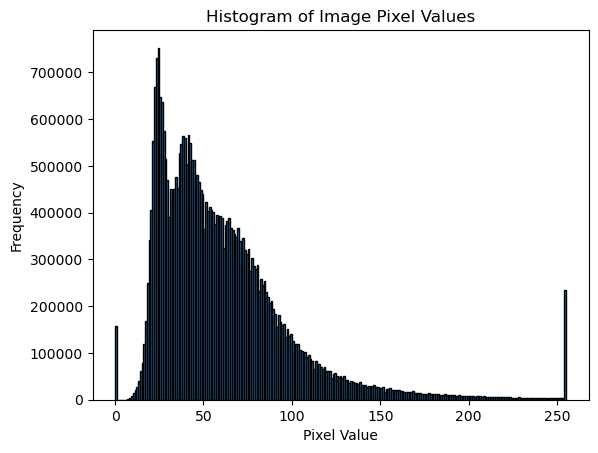

In [64]:
display_dist(clipped_image, 1, False)

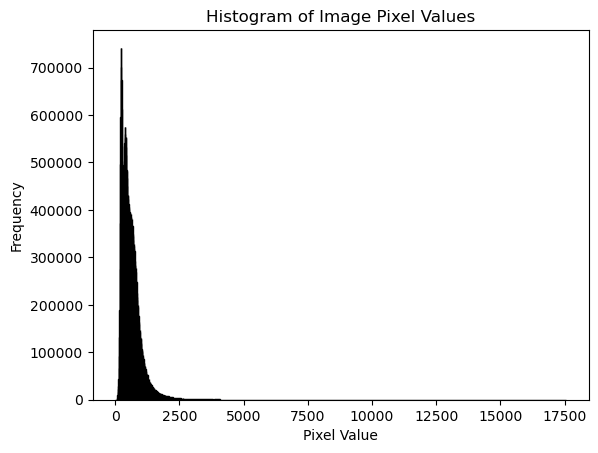

In [63]:
display_dist(image_array, 10, False)

In [6]:
datacube.print_json()

{
  "process_graph": {
    "loadcollection1": {
      "process_id": "load_collection",
      "arguments": {
        "bands": [
          "B04",
          "B03",
          "B02"
        ],
        "id": "SENTINEL2_L2A",
        "spatial_extent": {
          "west": 13.1,
          "south": 52.37,
          "east": 13.66,
          "north": 52.64
        },
        "temporal_extent": [
          "2024-05-15",
          "2024-05-17"
        ]
      },
      "result": true
    }
  }
}


In [271]:
result = datacube.execute(auto_decode=False)

In [277]:
rgb = datacube.save_result(format="GTiff")

In [279]:
job = rgb.create_job()
job.start_and_wait().download_results()

0:00:00 Job 'j-240603ca5c33490ca24bbfa4d35318cf': send 'start'
0:00:15 Job 'j-240603ca5c33490ca24bbfa4d35318cf': created (progress 0%)
0:00:21 Job 'j-240603ca5c33490ca24bbfa4d35318cf': created (progress 0%)
0:00:28 Job 'j-240603ca5c33490ca24bbfa4d35318cf': running (progress N/A)
0:00:37 Job 'j-240603ca5c33490ca24bbfa4d35318cf': running (progress N/A)
0:00:47 Job 'j-240603ca5c33490ca24bbfa4d35318cf': running (progress N/A)
0:00:59 Job 'j-240603ca5c33490ca24bbfa4d35318cf': running (progress N/A)
0:01:15 Job 'j-240603ca5c33490ca24bbfa4d35318cf': running (progress N/A)
0:01:34 Job 'j-240603ca5c33490ca24bbfa4d35318cf': running (progress N/A)
0:01:58 Job 'j-240603ca5c33490ca24bbfa4d35318cf': running (progress N/A)
0:02:28 Job 'j-240603ca5c33490ca24bbfa4d35318cf': running (progress N/A)
0:03:06 Job 'j-240603ca5c33490ca24bbfa4d35318cf': finished (progress 100%)


/tmp/ipykernel_565018/3148529208.py:2: UserDeprecationWarning: Call to deprecated method download_results. (Instead use `BatchJob.get_results` and the more flexible download functionality of `JobResults`) -- Deprecated since version 0.4.10.
  job.start_and_wait().download_results()
/home/radtklau/anaconda3/envs/amls-project/lib/python3.12/site-packages/openeo/rest/job.py:170: UserDeprecationWarning: Call to deprecated method get_result. (Use `BatchJob.get_results` instead.) -- Deprecated since version 0.4.10.
  return self.get_result().download_files(target)
/home/radtklau/anaconda3/envs/amls-project/lib/python3.12/site-packages/openeo/rest/job.py:174: UserDeprecationWarning: Call to deprecated class _Result. (Use `JobResults` instead) -- Deprecated since version 0.4.10.
  return _Result(self)


{PosixPath('/home/radtklau/Documents/Sentinel Building Segmentation/openEO.tif'): {'eo:bands': [{'center_wavelength': 0.6646,
    'name': 'B04'},
   {'center_wavelength': 0.5598, 'name': 'B03'},
   {'center_wavelength': 0.4924, 'name': 'B02'}],
  'href': 'https://openeo.dataspace.copernicus.eu/openeo/1.2/jobs/j-240603ca5c33490ca24bbfa4d35318cf/results/assets/MDQ1ZDdjYTktYmU2Ni00YzU1LWFlM2MtYTI1ZjJiNDAzOWRm/818a60f329eda7d405c1c05864574a00/openEO.tif?expires=1718024870',
  'proj:bbox': [370640, 5803030, 409330, 5833920],
  'proj:epsg': 32633,
  'proj:shape': [3089, 3869],
  'raster:bands': [{'name': 'B04',
    'statistics': {'maximum': 16104.0,
     'mean': 626.6179687512,
     'minimum': -299.0,
     'stddev': 479.55716318305,
     'valid_percent': 99.56}},
   {'name': 'B03',
    'statistics': {'maximum': 16680.0,
     'mean': 693.45683203432,
     'minimum': -625.0,
     'stddev': 386.89289409686,
     'valid_percent': 99.56}},
   {'name': 'B02',
    'statistics': {'maximum': 17544.0,

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 3869, 'height': 3089, 'count': 3, 'crs': CRS.from_epsg(32633), 'transform': Affine(10.0, 0.0, 370640.0,
       0.0, -10.0, 5833920.0), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}
num of bands: 3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/home/radtklau/anaconda3/envs/amls-project/lib/python3.12/site-packages/matplotlib/cm.py:494: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


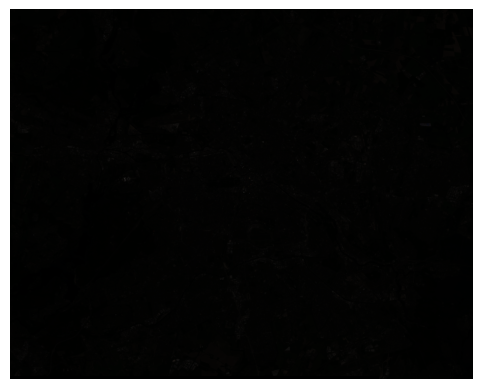

[[0.00402832 0.00498962 0.00320435]
 [0.00430298 0.00749207 0.00416565]
 [0.00646973 0.00724792 0.00512695]
 ...
 [0.00631714 0.00984192 0.00505066]
 [0.00663757 0.00979614 0.00466919]
 [0.00616455 0.0093689  0.00473022]]


In [296]:
tif_file = "openEO.tif"

with rasterio.open(tif_file) as src:
    data = src.read()

    print(src.profile)

    print(f"num of bands: {src.count}")
    """
    fig,ax = plt.subplot(1, src.count, figsize=(20,5))
    for i in range(src.count):
        show(data[i], ax=ax[i], title=f'band {i+1}')

    plt.show()
    """
    

    if src.count >= 3:
        rgb = np.dstack((data[0], data[1], data[2]))
        rgb = (rgb /65536)
        plt.imshow(rgb)
        plt.axis("off")
        plt.show()
    
    print(rgb[0])

In [7]:
image_array = imageio.imread(result)

/tmp/ipykernel_1241557/484495527.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image_array = imageio.imread(result)


In [8]:
print(image_array.shape)

(3, 3089, 3869)


In [9]:
print(np.nanmax(image_array))
print(np.nanmin(image_array))


17544
-32768


In [12]:
print(image_array[0, 0])
print(image_array.dtype)

[264 282 424 ... 414 435 404]
int16


In [299]:
test = image_array[0].flatten()
test1 = test/65536

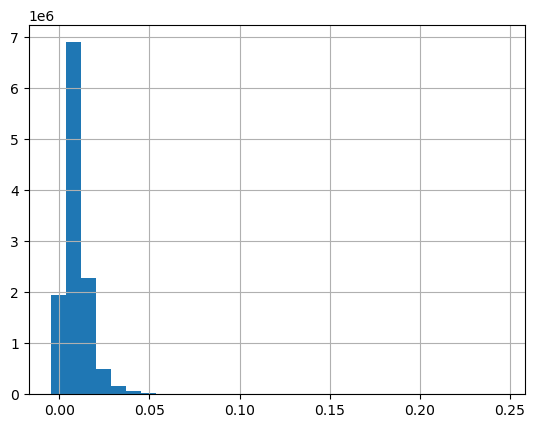

In [300]:


plt.hist(test1, bins=30)
plt.grid(True)
plt.show()

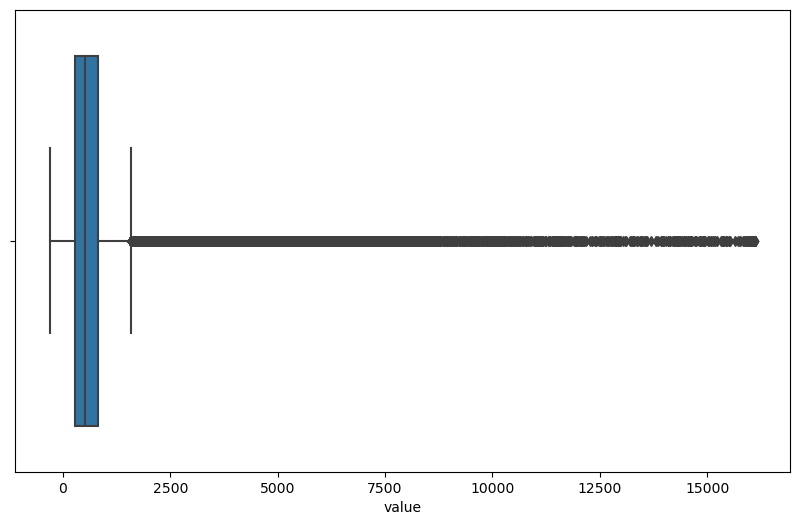

In [295]:
plt.figure(figsize=(10,6))
sns.boxplot(x=test)
plt.xlabel("value")
plt.show()

In [16]:
image_array[0] /= np.nanmax(image_array[0])
image_array[1] /= np.nanmax(image_array[1]) 
image_array[2] /= np.nanmax(image_array[2]) 

UFuncTypeError: Cannot cast ufunc 'divide' output from dtype('float64') to dtype('int16') with casting rule 'same_kind'

In [10]:
rgb_im = np.stack([image_array[0], image_array[1], image_array[2]], axis=-1)

In [221]:
def scale(arr):
    valid_mask = (arr >= 0) & ~np.isnan(arr)
    
    # Find the minimum and maximum values in the array, ignoring NaNs and negatives
    min_val = np.nanmin(arr[valid_mask])
    max_val = np.nanmax(arr[valid_mask])
    
    # Scale the array to be between 0 and 1, ignoring NaNs and negatives
    scaled_arr = np.full(arr.shape, np.nan)  # Initialize with NaNs
    scaled_arr[valid_mask] = (arr[valid_mask] - min_val) / (max_val - min_val)
    
    return scaled_arr

In [222]:
def scale2(arr):
    max_val = np.nanmax(arr)

    arr /= max_val
    
    return arr

In [248]:
print(np.nanmax(rgb_im))
print(np.nanmin(rgb_im))

10.0
-0.56942546


In [338]:
print(rgb_im.dtype)
rgb_im -= 100

int16


In [11]:
rgb_im.plot.imshow(vmin=0, vmax=2000)

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


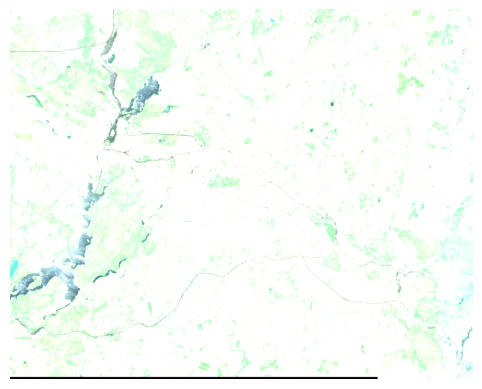

In [12]:
plt.imshow(rgb_im, vmin=0, vmax=255)
plt.axis("off")
plt.show()

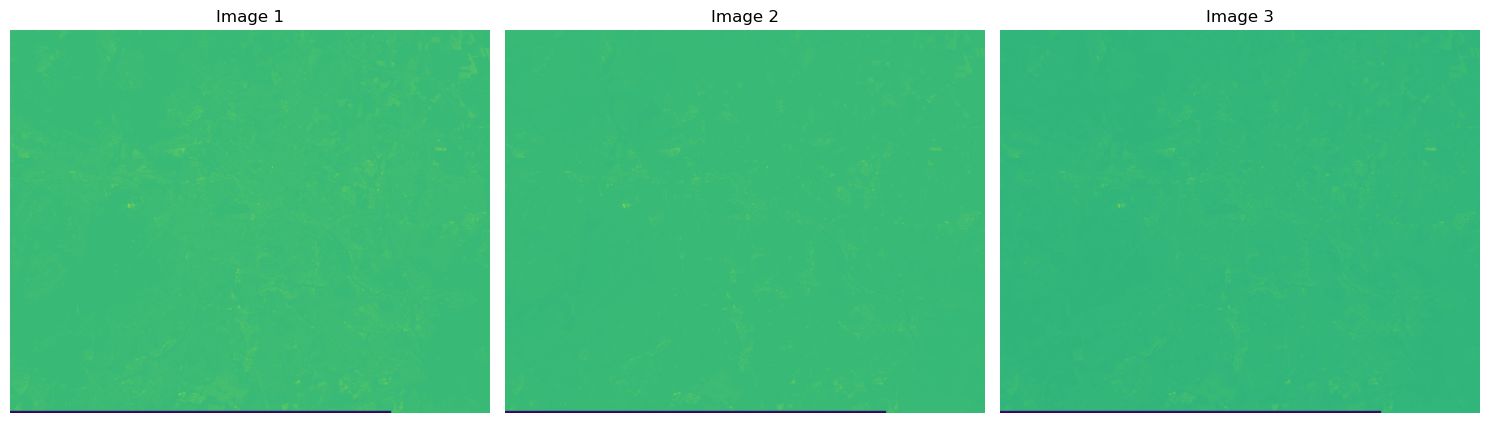

In [17]:
#plt.imshow(image_array[2])
#plt.axis("off")
#plt.show()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Plot each image
for i, image in enumerate(image_array):
    axes[i].imshow(image)
    axes[i].axis('off')  # Hide axis
    
    axes[i].set_title(f'Image {i+1}')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [131]:
print(image_array[0,1])
print(image_array[1,1])

[3298.  3325.3 3319.7 3330.6 3334.9 3335.2 3339.5 3360.9 3402.8 3448.3
 3446.  3452.8 3475.  3480.9 3495.7 3526.7 3529.7 3543.6 3572.  3618.7
 3703.9 3770.3 3812.1 3851.6 3906.1 3951.4 3963.  3962.7 3969.3 3947.4
 3901.1 3817.4 3706.7 3612.9 3539.4 3494.6 3512.5 3487.2 3482.9 3472.8
 3487.1 3467.9 3429.9 3399.3 3338.9 3300.5 3313.8 3334.1 3332.8 3319.8
 3318.2 3323.3 3399.7 3386.3 3323.7 3314.4 3310.1 3312.6 3319.2 3329.6
 3355.4 3359.1 3398.6 3374.2 3349.  3354.1 3375.5 3387.6 3372.8 3370.8
 3359. ]
[3288.6 3267.3 3296.7 3321.8 3314.7 3303.4 3302.3 3330.2 3347.2 3354.2
 3364.7 3380.6 3386.  3426.6 3423.4 3416.3 3440.3 3446.5 3439.4 3460.2
 3508.8 3546.  3642.5 3720.6 3771.7 3823.2 3883.3 3901.8 3935.3 3933.6
 3890.3 3837.6 3790.6 3722.5 3599.  3507.8 3435.1 3395.3 3395.5 3397.1
 3399.1 3380.5 3385.8 3371.8 3345.6 3296.8 3276.4 3296.  3288.3 3286.9
 3266.4 3272.4 3335.6 3313.9 3253.  3255.3 3260.1 3274.6 3288.5 3287.3
 3294.  3308.9 3330.  3303.5 3289.3 3305.3 3327.8 3318.9 3317.1 3313